# 欢迎来到线性回归项目

若项目中的题目有困难没完成也没关系，我们鼓励你带着问题提交项目，评审人会给予你诸多帮助。

所有选做题都可以不做，不影响项目通过。如果你做了，那么项目评审会帮你批改，也会因为选做部分做错而判定为不通过。

其中非代码题可以提交手写后扫描的 pdf 文件，或使用 Latex 在文档中直接回答。

#### 目录:
[1 矩阵运算](#1-矩阵运算)  
[2 Gaussian Jordan 消元法](#2-Gaussian-Jordan-消元法)  
[3  线性回归](#3-线性回归)

In [1]:
# 任意选一个你喜欢的整数，这能帮你得到稳定的结果
seed = 128 # DONE

# 1 矩阵运算

## 1.1 创建一个 4*4 的单位矩阵

In [2]:
# 这个项目设计来帮你熟悉 python list 和线性代数
# 你不能调用任何NumPy以及相关的科学计算库来完成作业

# 本项目要求矩阵统一使用二维列表表示，如下：
A = [[1,2,3], 
     [2,3,3], 
     [1,2,5]]

B = [[1,2,3,5], 
     [2,3,3,5], 
     [1,2,5,1]]

# 向量也用二维列表表示
C = [[1],
     [2],
     [3]]

#DONE: 创建一个 4*4 单位矩阵
I = [[1,0,0,0],
     [0,1,0,0],
     [0,0,1,0],
     [0,0,0,1]]

## 1.2 返回矩阵的行数和列数

In [3]:
# DONE: 返回矩阵的行数和列数
def shape(M):
    row = len(M)         # length for raw
    column = len(M[0])   # length for column 
    return (row, column)

In [4]:
# 运行以下代码测试你的 shape 函数
%run -i -e test.py LinearRegressionTestCase.test_shape

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


## 1.3 每个元素四舍五入到特定小数数位

In [5]:
# DONE: 每个元素四舍五入到特定小数数位
# 直接修改参数矩阵，无返回值
def matxRound(M, decPts=4):
    for i in range(len(M)):
        for j in range(len(M[i])):
            M[i][j] = round(M[i][j],decPts)

In [6]:
# 运行以下代码测试你的 matxRound 函数
%run -i -e test.py LinearRegressionTestCase.test_matxRound

.
----------------------------------------------------------------------
Ran 1 test in 0.007s

OK


## 1.4 计算矩阵的转置

In [7]:
# DONE 计算矩阵的转置
def transpose(M):
    # https://python3-cookbook.readthedocs.io/zh_CN/latest/c04/p11_iterate_over_multiple_sequences_simultaneously.html
    return [list(col) for col in zip(*M)] 
    return MT

In [8]:
# 运行以下代码测试你的 transpose 函数
%run -i -e test.py LinearRegressionTestCase.test_transpose

.
----------------------------------------------------------------------
Ran 1 test in 0.007s

OK


## 1.5 计算矩阵乘法 AB

In [9]:
# DONE 计算矩阵乘法 AB，如果无法相乘则raise ValueError
def matxMultiply(A, B):
        
    Res = [[0]*len(B[0]) for i in range(len(A))]
                 
    # A[i][k] * B[k][j] = C[i][j]
    for i in range(len(A)):               # row in matrx A
        for j in range(len(B[0])):        # column in matrx B
            for k in range(len(B)):       # row in matrx B
                if len(A[0]) != len(B):
                    raise ValueError('the column of A is not equal to row of B')
                else:
                    Res[i][j] +=  A[i][k] * B[k][j]
    return Res

In [10]:
# 运行以下代码测试你的 matxMultiply 函数
%run -i -e test.py LinearRegressionTestCase.test_matxMultiply

.
----------------------------------------------------------------------
Ran 1 test in 0.121s

OK


# 2 Gaussian Jordan 消元法
## 2.1 构造增广矩阵
$ A = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n}\\
    a_{21}    & a_{22} & ... & a_{2n}\\
    a_{31}    & a_{22} & ... & a_{3n}\\
    ...    & ... & ... & ...\\
    a_{n1}    & a_{n2} & ... & a_{nn}\\
\end{bmatrix} , b = \begin{bmatrix}
    b_{1}  \\
    b_{2}  \\
    b_{3}  \\
    ...    \\
    b_{n}  \\
\end{bmatrix}$

返回 $ Ab = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n} & b_{1}\\
    a_{21}    & a_{22} & ... & a_{2n} & b_{2}\\
    a_{31}    & a_{22} & ... & a_{3n} & b_{3}\\
    ...    & ... & ... & ...& ...\\
    a_{n1}    & a_{n2} & ... & a_{nn} & b_{n} \end{bmatrix}$

In [11]:
# DONE 构造增广矩阵，假设A，b行数相同
def augmentMatrix(A, b):
    # use zip to create a combined maxtrix of Ai + Bi
    return [Ai + bi for Ai,bi in zip(A,b)]    # update and reference from [6]

In [12]:
# 运行以下代码测试你的 augmentMatrix 函数
%run -i -e test.py LinearRegressionTestCase.test_augmentMatrix

.
----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


## 2.2 初等行变换
* 交换两行
* 把某行乘以一个非零常数
* 把某行加上另一行的若干倍：

In [13]:
# DONE r1 <---> r2
# 直接修改参数矩阵，无返回值
def swapRows(M, r1, r2):
    M[r1],M[r2] = M[r2],M[r1]  # Python在变量交换上有更为简洁的语法，a,b = b,a即可，不需要累赘的中间变量

In [14]:
# 运行以下代码测试你的 swapRows 函数# 运行以下代 
%run -i -e test.py LinearRegressionTestCase.test_swapRows

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


In [15]:
# DONE r1 <--- r1 * scale# TODO  
# scale为0是非法输入，要求 raise ValueError
# 直接修改参数矩阵，无返回值
def scaleRow(M, r, scale):
    if scale == 0:
        raise ValueError('the scale is zero !')
    else:
        M[r] = [i*scale for i in M[r]]

In [16]:
# 运行以下代码测试你的 scaleRow 函数
%run -i -e test.py LinearRegressionTestCase.test_scaleRow

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


In [17]:
# DONE r1 <--- r1 + r2*scale
# 直接修改参数矩阵，无返回值
def addScaledRow(M, r1, r2, scale):
    M[r1] = [x + y * scale for x,y in zip(M[r1],M[r2])]

In [18]:
# 运行以下代码测试你的 addScaledRow 函数
%run -i -e test.py LinearRegressionTestCase.test_addScaledRow

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


## 2.3 Gaussian Jordan 消元法求解 Ax = b
### 2.3.1 算法

步骤1 检查A，b是否行数相同

步骤2 构造增广矩阵Ab

步骤3 逐列转换Ab为化简行阶梯形矩阵 [中文维基链接]

&emsp;&emsp;对于Ab的每一列（最后一列除外）  
        &emsp;&emsp;&emsp;&emsp;当前列为列c  
        &emsp;&emsp;&emsp;&emsp;寻找列c中 对角线以及对角线以下所有元素（行 c~N）的绝对值的最大值  
        &emsp;&emsp;&emsp;&emsp;如果绝对值最大值为0  
            &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;那么A为奇异矩阵，返回None (你可以在选做问题2.4中证明为什么这里A一定是奇异矩阵)  
        &emsp;&emsp;&emsp;&emsp;否则  
            &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;使用第一个行变换，将绝对值最大值所在行交换到对角线元素所在行（行c）   
            &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;使用第二个行变换，将列c的对角线元素缩放为1  
            &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;多次使用第三个行变换，将列c的其他元素消为0  

步骤4 返回Ab的最后一列

*注：* 我们并没有按照常规方法先把矩阵转化为行阶梯形矩阵，再转换为化简行阶梯形矩阵，而是一步到位。如果你熟悉常规方法的话，可以思考一下两者的等价性。

### 2.3.2 算法推演
为了充分了解Gaussian Jordan消元法的计算流程，请根据Gaussian Jordan消元法，分别手动推演矩阵A为可逆矩阵，矩阵A为奇异矩阵两种情况。

推演示例
$Ab = \begin{bmatrix}
    -7 & 5 & -1 & 1\\
    1 & -3 & -8 & 1\\
    -10 &-2 & 9 & 1\end{bmatrix}$

$ --> $ $\begin{bmatrix}
    1 & \frac{1}{5} & -\frac{9}{10} & -\frac{1}{10}\\
    0 & -\frac{16}{5} & -\frac{71}{10} & \frac{11}{10}\\
    0 & \frac{32}{5} & -\frac{73}{10} & \frac{3}{10}\end{bmatrix}$

$ --> $ $\begin{bmatrix}
    1 & 0 & -\frac{43}{64} & -\frac{7}{64}\\
    0 & 1 & -\frac{73}{64} & \frac{3}{64}\\
    0 & 0 & -\frac{43}{4} & \frac{5}{4}\end{bmatrix}$

$ --> $ $\begin{bmatrix}
    1 & 0 & 0 & -\frac{3}{16}\\
    0 & 1 & 0 & -\frac{59}{688}\\
    0 & 0 & 1 & -\frac{5}{43}\end{bmatrix}$

推演有以下要求:  
*1. 展示每一列的消元结果, 比如3*3的矩阵, 需要写三步   
*2. 用分数来表示     
*3. 分数不能再约分     
*4. 我们已经给出了latex的语法,你只要把零改成你要的数字(或分数)即可  
*5. 可以用这个页面检查你的答案(注意只是答案, 推演步骤两者算法不一致)   

你可以用python的 fractions 模块辅助你的约分  

分数的输入方法  
(双击这个区域就能看到语法啦)  

示例一: $\frac{n}{m}$

示例二: $-\frac{a}{b}$

** 以下开始你的尝试吧!**

In [19]:
# 不要修改这里！
from helper import *
A = generateMatrix(3,seed,singular=False)
b = np.ones(shape=(3,1),dtype=int) # it doesn't matter
Ab = augmentMatrix(A.tolist(),b.tolist()) # 请确保你的增广矩阵已经写好了
printInMatrixFormat(Ab,padding=3,truncating=0)

  8,  9, -5 ||  1 
  8,  0, -8 ||  1 
  1,  7,  6 ||  1 


请按照算法的步骤3，逐步推演可逆矩阵的变换。

在下面列出每一次循环体执行之后的增广矩阵(注意使用分数语法)

$ Ab = \begin{bmatrix}
    8 & 9 & -5 & 1 \\
    8 & 0 & -8 & 1 \\
    1 & 7 & 6 & 1 \end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & \frac{9}{8} & -\frac{5}{8} & \frac{1}{8} \\    
    8 & 0 & -8 & 1 \\    
    1 & 7 & 6 & 1 \end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & \frac{9}{8} & -\frac{5}{8} & \frac{1}{8} \\    
    0 & -9 & -3 & 0 \\    
    1 & 7 & 6 & 1 \end{bmatrix}$    
    
$ --> \begin{bmatrix}
    1 & \frac{9}{8} & -\frac{5}{8} & \frac{1}{8} \\    
    0 & -9 & -3 & 0 \\    
    0 & \frac{47}{8} & \frac{53}{8} & \frac{7}{8} \end{bmatrix}$        
    
$ --> \begin{bmatrix}
    1 & \frac{9}{8} & -\frac{5}{8} & \frac{1}{8} \\    
    0 & -9 & -3 & 0 \\    
    0 & \frac{47}{8} & \frac{53}{8} & \frac{7}{8} \end{bmatrix}$
    
    
$ --> \begin{bmatrix}
    1 & \frac{9}{8} & -\frac{5}{8} & \frac{1}{8} \\    
    0 & 1 & \frac{1}{3} & 0 \\    
    0 & \frac{47}{8} & \frac{53}{8} & \frac{7}{8} \end{bmatrix}$      
    
$ --> \begin{bmatrix}
    1 & 0 & -1 & \frac{1}{8} \\    
    0 & 1 & \frac{1}{3} & 0 \\    
    0 & \frac{47}{8} & \frac{53}{8} & \frac{7}{8} \end{bmatrix}$  
    
$ --> \begin{bmatrix}
    1 & 0 & -1 & \frac{1}{8} \\    
    0 & 1 & \frac{1}{3} & 0 \\    
    0 & 0 & \frac{14}{3} & \frac{7}{8} \end{bmatrix}$ 
    
$ --> \begin{bmatrix}
    1 & 0 & -1 & \frac{1}{8} \\    
    0 & 1 & \frac{1}{3} & 0 \\    
    0 & 0 & 1 & \frac{3}{16} \end{bmatrix}$ 

$ --> \begin{bmatrix}
    1 & 0 & 0 & \frac{5}{16} \\    
    0 & 1 & \frac{1}{3} & 0 \\    
    0 & 0 & 1 & \frac{3}{16} \end{bmatrix}$ 

$ --> \begin{bmatrix}
    1 & 0 & 0 & \frac{5}{16} \\    
    0 & 1 & 0 & -\frac{1}{16} \\    
    0 & 0 & 1 & \frac{3}{16} \end{bmatrix}$ 

In [20]:
# 不要修改这里！# 不要修改这 
A = generateMatrix(3,seed,singular=True)
b = np.ones(shape=(3,1),dtype=int)
Ab = augmentMatrix(A.tolist(),b.tolist()) # 请确保你的增广矩阵已经写好了
printInMatrixFormat(Ab,padding=3,truncating=0)

 -9, -2, -1 ||  1 
 -4, -4, -1 ||  1 
  9,  2,  1 ||  1 


请按照算法的步骤3，逐步推演奇异矩阵的变换。

在下面列出每一次循环体执行之后的增广矩阵(注意使用分数语法)

$ Ab = \begin{bmatrix}
    -9 & -2 & -1 & 1 \\
    -4 & -4 & -1 & 1 \\
    9 & 2 & 1 & 1 \end{bmatrix}$

$ --> \begin{bmatrix}
    1 & \frac{2}{9} & \frac{1}{9} & -\frac{1}{9} \\
    -4 & -4 & -1 & 1 \\
    9 & 2 & 1 & 1 \end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & \frac{2}{9} & \frac{1}{9} & -\frac{1}{9} \\
    0 & -\frac{28}{9} & -\frac{5}{9} & \frac{5}{9} \\
    9 & 2 & 1 & 1 \end{bmatrix}$

$ --> \begin{bmatrix}
    1 & \frac{2}{9} & \frac{1}{9} & -\frac{1}{9} \\
    0 & -\frac{28}{9} & -\frac{5}{9} & \frac{5}{9} \\
    0 & 0 & 0 & 2 \end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & \frac{2}{9} & \frac{1}{9} & -\frac{1}{9} \\
    0 & 1 & \frac{5}{28} & -\frac{5}{28} \\
    0 & 0 & 0 & 2 \end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & 0 & \frac{1}{14} & \frac{19}{76} \\
    0 & 1 & \frac{5}{28} & \frac{5}{28} \\
    0 & 0 & 0 & 2 \end{bmatrix}$
    
return None

## 2.3.3 实现 Gaussian Jordan 消元法

In [21]:
# DONE 实现 Gaussain Jordan 方法求解 Ax = b

""" Gaussian Jordan 方法求解 Ax = b.
    参数
        A: 方阵 
        b: 列向量
        decPts: 四舍五入位数，默认为4
        epsilon: 判读是否为0的阈值，默认 1.0e-16
        
    返回列向量 x 使得 Ax = b 
    返回None，如果 A，b 高度不同
    返回None，如果 A 为奇异矩阵
"""
    
def gj_Solve(A, b, decPts=4, epsilon=1.0e-16):
    if len(A) != len(b):                 # checking row A is equal to row B
        raise ValueError('the column of Matrix A is not equal to the row of Matrix b')
        return None
    Ab = augmentMatrix(A, b)
    
    # according the result of first review and further understand the "算法推演"
    # re-write the "for loop" of the column and "for loop" of the row without any reference  :)
    # I find my first version need run in test with 2.554 s,
    # but for my current version, need run in test with 1.839 s ~ 2.30 s    :)
    
    for c in range(len(Ab[0])-1):                               # for every column in Ab except last column
        max_value_in_low_column_c = 0
        row_need_to_change = 0
        
        for r in range(c,len(Ab)):                              # for every row in Ab, the start of row is 'c' row          
            # to judge current element is the max value in column the after c
            if abs(Ab[r][c]) > max_value_in_low_column_c: 
                max_value_in_low_column_c = abs(Ab[r][c])          # current value is the max value
                row_need_to_change = r                             # current row num is the row with max value
        if abs(max_value_in_low_column_c) < epsilon: return None   # abs value should > 0, or it is singular matrix.
        
        swapRows(Ab,c,row_need_to_change)   # ex-change the row with max value to the row in the position of diagonal 
        
        if abs(Ab[c][c]) < epsilon:
            raise ValueError('divided by zero')
            return None
        else:
            scaleRow(Ab,c,1.0/Ab[c][c])     # scale the dignal element to 1, take care the element not equal to 0
        
        for r in range(len(A)):             # for every row, we need to cancel the element to '0', except row c.
            if abs(Ab[r][c]) < epsilon:
                continue
            if r !=c:                       # the row not include the row in the position of diagonal
                addScaledRow(Ab,r,c,-Ab[r][c])  # addScaledRow(M, r1, r2, scale) "r1 <--- r1 + r2*scale"
    
    result_of_matrix = [[row_of_b[-1]] for row_of_b in Ab]  # the result of the matrix is the last column of Ab
    matxRound(result_of_matrix,decPts)                      # round the result
    return result_of_matrix

In [22]:
# 运行以下代码测试你的 gj_Solve 函数
%run -i -e test.py LinearRegressionTestCase.test_gj_Solve

.
----------------------------------------------------------------------
Ran 1 test in 2.115s

OK


## (选做) 2.4 算法正确判断了奇异矩阵：
在算法的步骤3 中，如果发现某一列对角线和对角线以下所有元素都为0，那么则断定这个矩阵为奇异矩阵。

我们用正式的语言描述这个命题，并证明为真。

证明下面的命题：

** 如果方阵 A 可以被分为4个部分: **

 $ A = \begin{bmatrix} 
    I    & X \\
    Z    & Y \\
\end{bmatrix} , \text{其中 I 为单位矩阵，Z 为全0矩阵，Y 的第一列全0}$，

** 那么A为奇异矩阵。**

提示：从多种角度都可以完成证明

考虑矩阵 Y 和 矩阵 A 的秩
考虑矩阵 Y 和 矩阵 A 的行列式
考虑矩阵 A 的某一列是其他列的线性组合
TODO 证明：|

# 3 线性回归
## 3.1 随机生成样本点

<IPython.core.display.Javascript object>


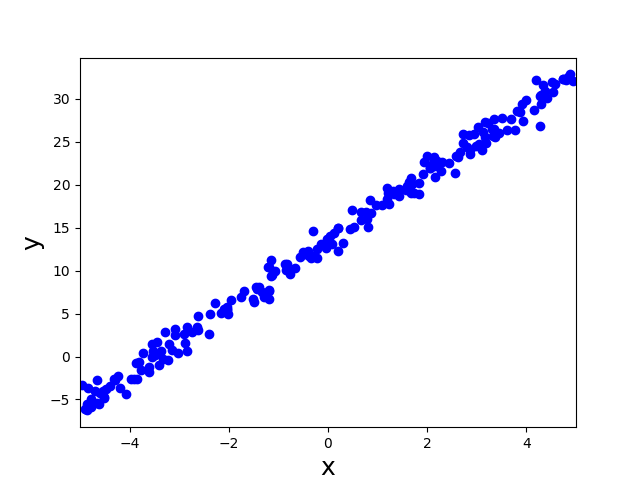

In [23]:
# 不要修改这里！
%matplotlib notebook
from helper import *

X,Y = generatePoints2D(seed)
vs_scatter_2d(X, Y)

## 3.2 拟合一条直线
### 3.2.1 猜测一条直线

<IPython.core.display.Javascript object>


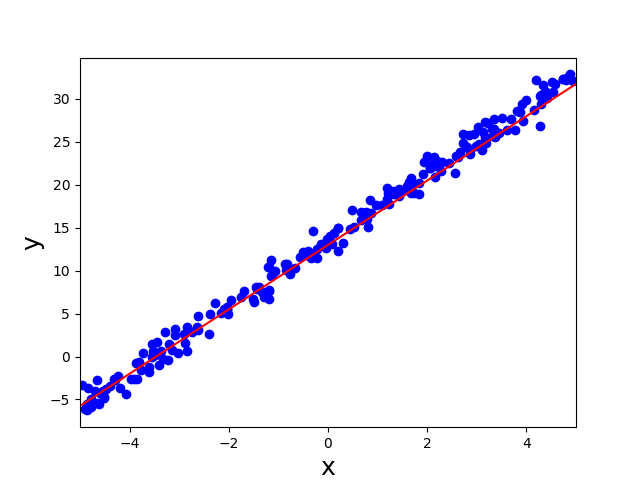

In [24]:
#DONE 请选择最适合的直线 y = mx + b
m1 = 3.75
b1 = 13.

# 不要修改这里！
vs_scatter_2d(X, Y, m1, b1)

## 3.2.2 计算平均平方误差 (MSE)
我们要编程计算所选直线的平均平方误差(MSE), 即数据集中每个点到直线的Y方向距离的平方的平均数，表达式如下： $$
MSE = \frac{1}{n}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

In [25]:
# DONE 实现以下函数并输出所选直线的MSE
def calculateMSE2D(X,Y,m,b):
    MSE = 0
    for xi in range(len(X)):
        MSE += (Y[xi] - m*X[xi] - b)**2
    
    MSE = MSE/len(X)
    return MSE

# DONE 检查这里的结果, 如果你上面猜测的直线准确, 这里的输出会在1.5以内
print(calculateMSE2D(X,Y,m1,b1))

1.3873978317242084


## 3.2.3 调整参数 $m, b$ 来获得最小的平方平均误差
你可以调整3.2.1中的参数 $m1,b1$ 让蓝点均匀覆盖在红线周围，然后微调 $m1, b1$ 让MSE最小。

## 3.3 (选做) 找到参数 $m, b$ 使得平方平均误差最小
这一部分需要简单的微积分知识(  $ (x^2)' = 2x $ )。因为这是一个线性代数项目，所以设为选做。

刚刚我们手动调节参数，尝试找到最小的平方平均误差。下面我们要精确得求解 $m, b$ 使得平方平均误差最小。

定义目标函数 $E$ 为 $$
E = \frac{1}{2}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

因为 $E = \frac{n}{2}MSE$, 所以 $E$ 取到最小值时，$MSE$ 也取到最小值。要找到 $E$ 的最小值，即要找到 $m, b$ 使得 $E$ 相对于 $m$, $E$ 相对于 $b$ 的偏导数等于0.

因此我们要解下面的方程组。

$$
\begin{cases}
\displaystyle
\frac{\partial E}{\partial m} =0 \\
\\
\displaystyle
\frac{\partial E}{\partial b} =0 \\
\end{cases}
$$
### 3.3.1 计算目标函数相对于参数的导数
首先我们计算两个式子左边的值

证明/计算： $$
\frac{\partial E}{\partial m} = \sum_{i=1}^{n}{-x_i(y_i - mx_i - b)}
$$

$$
\frac{\partial E}{\partial b} = \sum_{i=1}^{n}{-(y_i - mx_i - b)}
$$
TODO 证明:

### 3.3.2 实例推演
现在我们有了一个二元二次方程组

$$
\begin{cases}
\displaystyle
\sum_{i=1}^{n}{-x_i(y_i - mx_i - b)} =0 \\
\\
\displaystyle
\sum_{i=1}^{n}{-(y_i - mx_i - b)} =0 \\
\end{cases}
$$
为了加强理解，我们用一个实际例子演练。

我们要用三个点 $(1,1), (2,2), (3,2)$ 来拟合一条直线 y = m*x + b, 请写出

目标函数 $E$,
二元二次方程组，
并求解最优参数 $m, b$
TODO 写出目标函数，方程组和最优参数

### 3.3.3 将方程组写成矩阵形式
我们的二元二次方程组可以用更简洁的矩阵形式表达，将方程组写成矩阵形式更有利于我们使用 Gaussian Jordan 消元法求解。

请证明 $$
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix} = X^TXh - X^TY
$$

其中向量 $Y$, 矩阵 $X$ 和 向量 $h$ 分别为 : $$
Y =  \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix}
,
X =  \begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix},
h =  \begin{bmatrix}
    m \\
    b \\
\end{bmatrix}
$$

TODO 证明:

至此我们知道，通过求解方程 $X^TXh = X^TY$ 来找到最优参数。这个方程十分重要，他有一个名字叫做 Normal Equation，也有直观的几何意义。你可以在 子空间投影 和 投影矩阵与最小二乘 看到更多关于这个方程的内容。

## 3.4 求解 $X^TXh = X^TY$  
在3.3 中，我们知道线性回归问题等价于求解 $X^TXh = X^TY$ (如果你选择不做3.3，就勇敢的相信吧，哈哈)

In [26]:
# DONE 实现线性回归
'''
参数：X, Y 存储着一一对应的横坐标与纵坐标的两个一维数组
返回：线性回归的系数(如上面所说的 m, b)
'''
# XT*X*h = XT*Y ---> AX=B ---> gj_Solve(A, b, decPts=4, epsilon=1.0e-16) 
#                         ---> XT*X --> A, x --> h, XT*Y --> b 
def linearRegression2D(X,Y):
    MX = [[x,1] for x in X]      # reference: https://docs.python.org/3/tutorial/datastructures.html
    Y = [[y] for y in Y]
    XT = transpose(MX)
    A = matxMultiply(XT, MX)     # A = XT * X
    b = matxMultiply(XT, Y)     # b = XT * Y
    h = gj_Solve(A, b, decPts=4, epsilon=1.0e-16)
    
    return h[0][0],h[1][0]

In [27]:
# 请不要修改下面的代码
m2,b2 = linearRegression2D(X,Y)
assert isinstance(m2,float),"m is not a float"
assert isinstance(b2,float),"b is not a float"
print(m2,b2)

3.8828 13.54


你求得的回归结果是什么？ 请使用运行以下代码将它画出来。

<IPython.core.display.Javascript object>


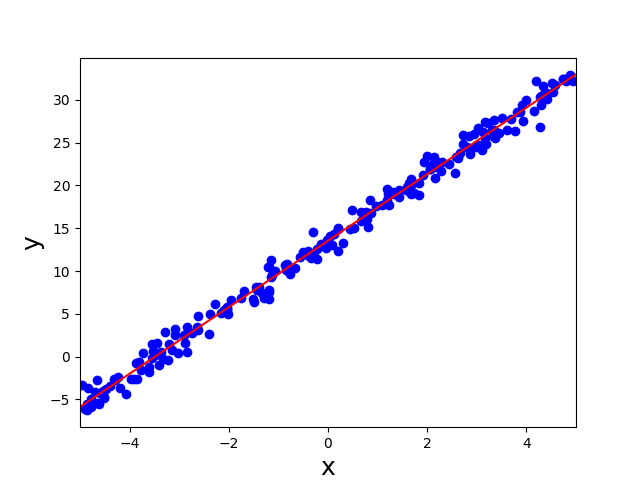

0.948745220654667


In [28]:
## 请不要修改下面的代码
vs_scatter_2d(X, Y, m2, b2)
print(calculateMSE2D(X,Y,m2,b2))

## Bonus !!!
如果你的高斯约当消元法通过了单元测试, 那么它将能够解决多维的回归问题
你将会在更高维度考验你的线性回归实现

<IPython.core.display.Javascript object>


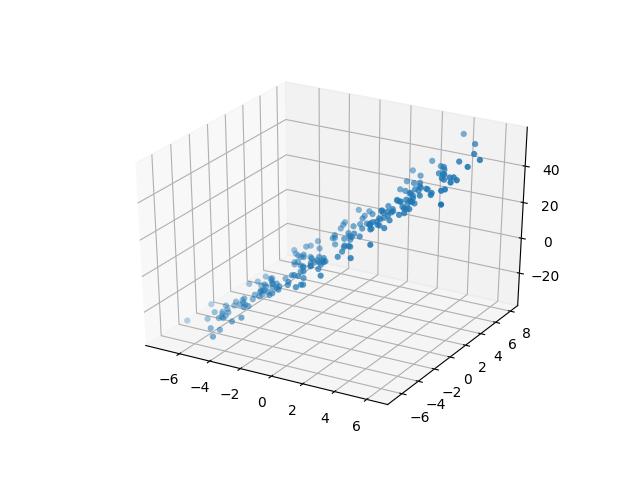

In [29]:
# 生成三维的数据点
X_3d, Y_3d = generatePoints3D(seed)
vs_scatter_3d(X_3d, Y_3d)

你的线性回归是否能够对付三维的情况?

In [30]:
def linearRegression(X,Y):
    return None

<IPython.core.display.Javascript object>


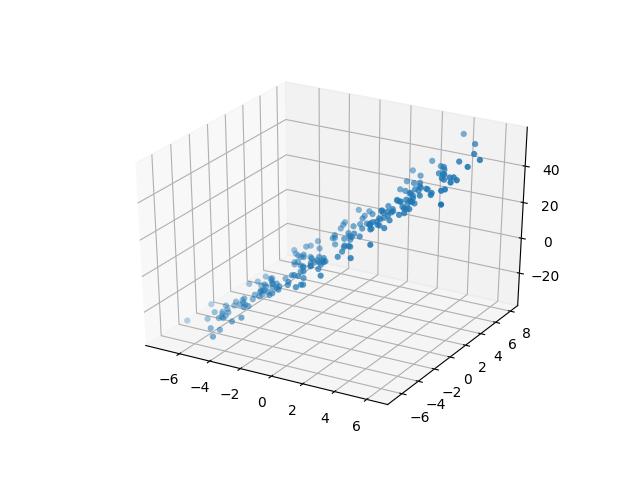

In [31]:
coeff  =  linearRegression(X_3d, Y_3d)
vs_scatter_3d(X_3d, Y_3d, coeff)